<a href="https://colab.research.google.com/github/yanghyeon408/OpenCV/blob/master/06_%ED%8A%B9%EC%A7%95%EC%B6%94%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6.1 라벨링  
연결되어 있는 모든 화소에 같은 번호를 붙이고 다른 연결 성분에는 다른 번호를 붙임


In [ ]:
def labelset(img, xs, ys, label):
    height, width = img.shape
    img[ys, xs] = label
    while True:
        cnt = 0

        for y in range(1, height - 1):      #테두리는 안하려고
            for x in range(1, width-1):
                if img[y, x] == label:
                    if  img[y  , x+1] == 255 :
                        img[y  , x+1] = label; cnt = cnt + 1
                    if  img[y-1, x+1] == 255 :
                        img[y-1, x+1] = label; cnt = cnt + 1
                    if  img[y-1, x  ] == 255 :
                        img[y-1, x  ] = label; cnt = cnt + 1
                    if  img[y-1, x-1] == 255 :
                        img[y-1, x-1] = label; cnt = cnt + 1
                    if  img[y  , x-1] == 255 :
                        img[y  , x-1] = label; cnt = cnt + 1
                    if  img[y+1, x-1] == 255 :
                        img[y+1, x-1] = label; cnt = cnt + 1
                    if  img[y+1, x  ] == 255 :
                        img[y+1, x  ] = label; cnt = cnt + 1
                    if  img[y+1, x+1] == 255 :
                        img[y+1, x+1] = label; cnt = cnt + 1
        if cnt == 0:
            return (0, img)
    return (1, img)   #0, 1별 의미는 없고 파이썬은 뭐 씨랑 달라서 보기가 안되나 암튼 그래서 해줫데
              


In [ ]:
def labeling(img_in, cnt):
    height, width = img_in.shape
    img_label = img_in.copy()

    label = 100         #연결 성분의 라벨 베이스 값
    for y in range(1, height -1):
        for x in range(1, width -1):
            if img_label[y, x] == 255:
                if label >= 255:
                    print("Error! too many labels")
                    return -1

                _, img_label = labelset(img_label, x, y, label)     #python에서 _는 버릴꺼에 지정한대보통
                label = label + 1
    cnt = label - 100     # 100 앞에 지정해줫으니 빼는 것

    return img_label, cnt

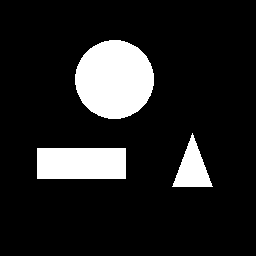

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('shape.png', 0)
cv2_imshow(img)

In [ ]:
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY) # 색이 검 흰 밖에 없긴 하지만 이진화 해줌
labeled_img, cnt = labeling(bin_img, 100)
cnt

3

cnt = 3 이다 오브젝트의 수는 3개

In [ ]:
#원, 세모, 네모 안의 읨의 좌표
labeled_img[80, 100], labeled_img[160, 190], labeled_img[160, 60]

(100, 101, 102)

openCV는 (1, 2, 3)으로나오는데 우리가 라벨을 100으로 해서 100, 101, 102ㅎ가 나옴

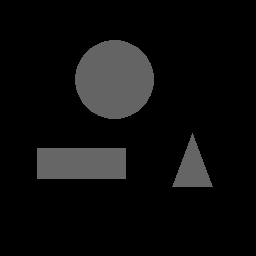

In [ ]:
cv2_imshow(labeled_img)

In [ ]:
cv2.imwrite('shape_labeled.png', labeled_img)

True

In [ ]:
img = cv2.imread('shape.png', 0)
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
cnt, labeled_img = cv2.connectedComponents(bin_img)

In [ ]:
labeled_img[80, 100], labeled_img[160, 190], labeled_img[160, 60]

(1, 2, 3)

In [ ]:
labeled_img.dtype

dtype('int32')

(1, 2, 3)은 검정이라 구분이 잘 안가서 50을 곱해줘서 (50, 100, 150)으로 만들어서 구분가게 해줌

In [ ]:
labeled_img = labeled_img*50

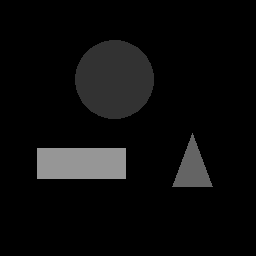

In [ ]:
import numpy as np

cv2_imshow(labeled_img.astype(np.uint8))

##6.1.1 특징 파라미터 추출

##6.1.2 면적과 중심 위치  
면적 : 물체에 포함된 화소 수를 계산합니다.   
중심 : 백색 화소의 위치 𝒙𝒊 , 𝒚𝒊 (𝒊 = 𝟎, … , 𝒏 − 𝟏)의 평균값을 계산합니다


In [ ]:
def calc_size(image_label, label):
    tx, ty = 0, 0
    cx, cy = 0, 0   #반환할 중심점
    total = 0
    height, width = image_label.shape
    for y in range(height):
        for x in range(width):
            if image_label[y, x] == label:
                tx = tx + x
                ty = ty + y
                total = total + 1
    if total == 0:
        return 0
    cx = int(tx/total)
    cy = int(ty/total)
    return (cx, cy, total)

In [ ]:
img = cv2.imread('shape.png', 0)
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
labeled_img, cnt = labeling(bin_img, 100)
for i in range(cnt):
    cx, cy, area = calc_size(labeled_img, i+100)   #100을 더하는 이유는 우리가 라벨에 100을 해놔서
    print(cx, cy, area)

114 79 4880
192 168 1108
81 163 2759


##6.1.2 주위 길이

처음 100 위치를 찾은다음 그 전위치가 주목 화소가 되서 [x-1, y 값이 전달 된다]  그니깐 라벨이 얼마인지를 읽으려면 [y, x+1]값을 읽어야한다  
파이썬은 swith 없어서 아래구문으로 내려가려고 if 다음에 else 로  
vector = 5 에서 주위 화소 비교하고 레이블된게 없으면 다음으로 넘어간다  

In [ ]:
import numpy as np


def trace(image_label, xs, ys):
    length = 0
    x, y = xs, ys
    no = image_label[y, x+1]
    vector = 5

    while True:
        if (x == xs) & (y == ys) & (length != 0):
            return length
        image_label[y, x] = 255

        if vector == 3:
            if (image_label[y, x+1] != no) & (image_label[y-1, x+1] == no):
                x = x + 1
                y = y
                length = length + 1
                vector = 0
                continue
            else:
                vector = 4
        if vector == 4:
            if (image_label[y-1, x+1] != no) & (image_label[y-1, x] == no):
                x = x + 1
                y = y -1
                length = length + np.sqrt(2)
                vector = 1
                continue
            else:
                vector = 5
        if vector == 5:
            if (image_label[y-1, x] != no) & (image_label[y-1, x-1] == no):
                x = x
                y = y -1
                length = length + 1
                vector = 2
                continue
            else:
                vector = 6
        if vector == 5:
            if (image_label[y-1, x] != no) & (image_label[y-1, x-1] == no):
                x = x
                y = y -1
                length = length + 1
                vector = 2
                continue
            else:
                vector = 6
        if vector == 6:
            if (image_label[y-1, x-1] != no) & (image_label[y, x-1] == no):
                x = x -1
                y = y -1
                length = length + np.sqrt(2)
                vector = 3
                continue
            else:
                vector = 7
        if vector == 7:
            if (image_label[y, x-1] != no) & (image_label[y+1, x-1] == no):
                x = x -1
                y = y 
                length = length + 1
                vector = 4
                continue
            else:
                vector = 0
        if vector == 0:
            if (image_label[y+1, x-1] != no) & (image_label[y+1, x] == no):
                x = x -1
                y = y +1
                length = length + np.sqrt(2)
                vector = 5
                continue
            else:
                vector = 1
        if vector == 1:
            if (image_label[y+1, x] != no) & (image_label[y+1, x+1] == no):
                x = x 
                y = y + 1
                length = length + 1
                vector = 6
                continue
            else:
                vector = 2
        if vector == 2:
            if (image_label[y+1, x+1] != no) & (image_label[y, x+1] == no):
                x = x +1
                y = y +1
                length = length + np.sqrt(2)
                vector = 7
                continue
            else:
                vector = 3

In [ ]:
def calc_length(image_label, label):
    height, width = image_label.shape
    for y in range(height):
        for x in range(width):
            if image_label[y,x] == label:
                length = trace(image_label, x -1, y)
                return length

In [ ]:
def features(image_label, cnt):
    areas = []; centers = []; lengths = []; ratios = []

    for i in range(cnt):
        cx, cy, area = calc_size(image_label, i + 100)
        centers.append((cx, cy))
        areas.append(area)
        print(i+100, cx, cy, area, end=" ")
        length = calc_length(image_label, i + 100)
        lengths.append(length)
        ratio = 4*np.pi*area / (length*length)
        print(length, ratio)
    return (areas, centers, lengths, ratios)

In [ ]:
img = cv2.imread('shape.png', 0)
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
labeled_img, cnt = labeling(bin_img, 100)
feat = features(labeled_img, cnt)


100 114 79 4880 263.7645019878176 0.8814486001080429
101 192 168 1108 168.2253967444163 0.49200158512447256
102 81 163 2759 241.6568542494924 0.5936949146124189


라벨, cx, cy, area, length, ratio  
ratio 가 1 에 가까울 수록 원모양 이다

##6.1.3 Contour

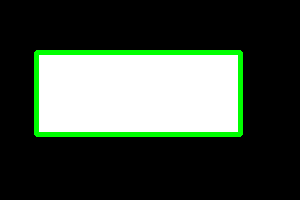

In [ ]:
import numpy as np
import cv2

img = cv2.imread('rectangle.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#thresold 를 이용하여 binary image로 변환
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

#contours는 point의 list 형태
#예제에서는 사각형이 하나의 contours line을 구성하기 때문에
#len(contours) = 1, 값은 사각형의 꼭지점 좌표
#hierachy는 contours line의 계층구조
contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

from google.colab.patches import cv2_imshow
cv2_imshow(image)

##6.1.4 moments

In [ ]:
import numpy as np
import cv2

img = cv2.imread('rectangle.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#첫번째 contours의 moment특징 추출
cnt = contours[0]
M = cv2.moments(cnt)

print(M.items())

dict_items([('m00', 16728.0), ('m10', 2308464.0), ('m01', 1555704.0), ('m20', 376580736.0), ('m11', 214687152.0), ('m02', 154053728.0), ('m30', 67979647872.0), ('m21', 35022008448.0), ('m12', 21259414464.0), ('m03', 16070422320.0), ('mu20', 58012704.0), ('mu11', 0.0), ('mu02', 9373256.0), ('mu30', 0.0), ('mu21', 0.0), ('mu12', 0.0), ('mu03', 0.0), ('nu20', 0.20731707317073172), ('nu11', 0.0), ('nu02', 0.0334967320261438), ('nu30', 0.0), ('nu21', 0.0), ('nu12', 0.0), ('nu03', 0.0)])


In [ ]:
cv2.contourArea(cnt)

16728.0

In [ ]:
cv2.arcLength(cnt, True)

572.0

In [ ]:
cv2.arcLength(cnt, False)

368.0

6.3.3. contour approximation

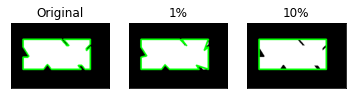

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('bad_rectangle.png')
img1 = img.copy()
img2 = img.copy()

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

#적용하는 숫자가 커질 수록 point의 갯수는 감소
epsilon1 = 0.01*cv2.arcLength(cnt, True)    #1% 오차허용?
epsilon2 = 0.1*cv2.arcLength(cnt, True)     #10%

approx1 = cv2.approxPolyDP(cnt, epsilon1, True)
approx2 = cv2.approxPolyDP(cnt, epsilon2, True)

cv2.drawContours(img, [cnt], 0, (0, 255, 0), 3)   #215개의 point
cv2.drawContours(img1, [approx1], 0, (0, 255, 0), 3)    #21개의 point
cv2.drawContours(img2, [approx2], 0, (0, 255, 0), 3)    #4개의 point

titles = ['Original', '1%', '10%']
images = [img, img1, img2]

for i in range(3):
    plt.subplot(1, 3, i +1), plt.title(titles[i]), plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])

plt.show()


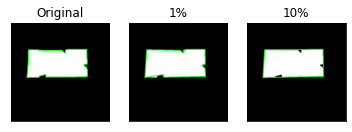

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('original.png')
img1 = img.copy()
img2 = img.copy()

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

#적용하는 숫자가 커질 수록 point의 갯수는 감소
epsilon1 = 0.01*cv2.arcLength(cnt, True)    #1% 오차허용?
epsilon2 = 0.1*cv2.arcLength(cnt, True)     #10%

approx1 = cv2.approxPolyDP(cnt, epsilon1, True)
approx2 = cv2.approxPolyDP(cnt, epsilon2, True)

cv2.drawContours(img, [cnt], 0, (0, 255, 0), 3)   #215개의 point
cv2.drawContours(img1, [approx1], 0, (0, 255, 0), 3)    #21개의 point
cv2.drawContours(img2, [approx2], 0, (0, 255, 0), 3)    #4개의 point

titles = ['Original', '1%', '10%']
images = [img, img1, img2]

for i in range(3):
    plt.subplot(1, 3, i +1), plt.title(titles[i]), plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])

plt.show()

#6.2 Bounding box


##6.2.1 bounding Rectangle, Circle, Ellipse

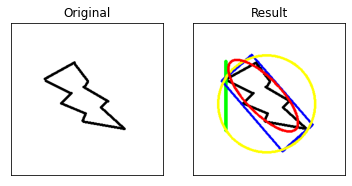

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lightning.png')
img1 = img.copy()

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]

#straight rectangle
x, y, w, h = cv2.boundingRect(cnt)
img1 = cv2.rectangle(img1, (x, y), (x+2, y+h), (0, 255, 0), 3)  #green

# rotated rectangle
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img1 = cv2.drawContours(img1, [box], 0, (0, 0, 255), 3)   #blue

# minimum enclosing circle
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
img1 = cv2.circle(img1, center, radius, (255, 255, 0), 3)   #yellow

# fitting an ellipse
ellipse = cv2.fitEllipse(cnt)
img1 = cv2.ellipse(img1, ellipse, (255, 0, 0), 3)   #red

titles = ['Original', 'Result']
images = [img, img1]

for i in range(2):
    plt.subplot(1, 2, i+1), plt.title(titles[i]), plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])

plt.show()

##6.2.2 Contour Property

#6.3 Convex Hull

##6.3.1 Convex Hull  
Contours point를 모두 포함하는 볼록한 외관선을 의미  
Contour Approximation과 유사한 결과지만, 방법은 전혀 다름

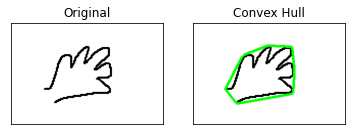

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('hand.png')
img1 = img.copy()

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]   #1이 손 모양 주변의 contour
hull = cv2.convexHull(cnt)

cv2.drawContours(img1, [hull], 0, (0, 255, 0), 3)

titles = ['Original', 'Convex Hull']
images = [img, img1]

for i in range(2):
    plt.subplot(1, 2, i+1), plt.title(titles[i]), plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
print(len(contours))

1


##6.3.2 Checking Convexity

cv2.isContourConvex() 함수는 contour가 convex인지 아닌지 판단  
convex란 contour line이 볼록하거나 최소한 평평한 것을 말함  
첫번째 이미지는 전체 외곽선(사각형) contour 이고 두번째는 손모양의 contour line이다

In [ ]:
cv2.isContourConvex(contours[0])

True

In [ ]:
cv2.isContourConvex(contours[1])

False

손가락 마디가 들어가니깐 오목한 부분이 있으니깐 볼록하냐고 물었는데 false 리턴

False True
19


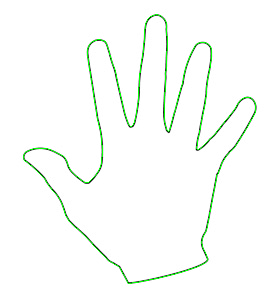

In [ ]:
import cv2
import numpy as np

img = cv2.imread('hand.jpg')
img2 = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cntr = contours[0]
cv2.drawContours(img, [cntr], -1, (0, 255, 0), 1)

#볼록 선체 찾기(좌표기준)와 그리기
hull = cv2.convexHull(cntr)
cv2.drawContours(img2, [hull], -1, (0, 255, 0), 1)

print(cv2.isContourConvex(cntr), cv2.isContourConvex(hull))

#볼록 선체 찾기(인덱스 기준)
hull2 = cv2.convexHull(cntr, returnPoints=False)

#볼록 선체 결함 찾기
defects = cv2.convexityDefects(cntr, hull2)
print(defects.shape[0])
for i in range(defects.shape[0]):
    startP, endP, farthestP, distance = defects[i, 0]
    farthest = tuple(cntr[farthestP][0])
    dist = distance / 256.0
    if dist > 1:
        # 빨간색 점 표시
        cv2.circle(img2, farthest, 3, (0, 0, 255), -1)

cv2_imshow(img)

도형 매칭으로 비슷한 도형찾기

#6.4 푸리에 변환

주변 픽셀과의 밝기 변화가 많은 곳은 고주파로, 변화가 적은 곳은 저주파로 표현 가능  
이미지에서 고주파의 의미는 경계선을 의미하고, 저주파는 배경을 의미

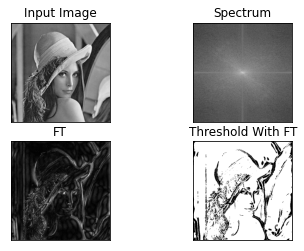

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("lena.jpg")
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

"""
Fourier Transform 을 적용
적용하면 0,0 즉, 화면 좌측 상단점이 중심이고, 거기에 저주파가 모여있음
분석을 용이하기 위해 0,0을 이미지의 중심으로 이동시키고 log scaling을 하여
분석이 용이한 결과값으로 변환
"""
f = np.fft.fft2(img)    #이미지에 푸리에 변환 적용
fshift = np.fft.fftshift(f)   #주파수가 0인 부분을 중앙에 위치시킴
magnitude_spectrum = 20*np.log(np.abs(fshift))  #spectrum 구하는 수학식

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)   #이미지의 중심 좌표

#중앙에서 10x10 사이즈의 사각형의 값을 1로 설정함. 중앙의 저주파를 모두 제거
#저주파를 제거하였기 때문에 배경이 사라지고 경계선만 남게 됨

d = 10
fshift[crow-d:crow+d, ccol-d:ccol+d] = 1

#푸리에 변환 결과를 다시 이미지로 변환
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

#threshold를 적용하기 위해 float type을 int type으로 변환
img_new = np.uint8(img_back);
ret, thresh = cv2.threshold(img_new, 30, 255, cv2.THRESH_BINARY_INV)

plt.subplot(221), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(magnitude_spectrum, cmap ='gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(img_back, cmap='gray')
plt.title('FT'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(thresh, cmap = 'gray')
plt.title('Threshold With FT'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2
import numpy as np

img = cv2.imread('lenagray.png', 0)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

d = 30
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-d:crow+d, ccol-d:ccol+d] = 1

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back =  cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('FT'),plt.xticks([]), plt.yticks([])
plt.show()

TypeError: ignored